In [23]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [24]:
# Which data
dataset = 'admission'
# fetch data 

if dataset == 'admission':
    admission_data = pd.read_csv('admission_data_ng.csv')
    admission_data.head()
else:
    diabetes_data = pd.read_csv('diabetes.csv')
    diabetes_data.head()

,Test 1 Score,Test 2 Score,Admit
0,34.62,78.02,0
1,30.29,43.89,0
2,35.85,72.90,0
3,60.18,86.31,1
4,79.03,75.34,1


Text(0.5, 0, 'Test 1 Score')

Text(0, 0.5, 'Test 2 Score')

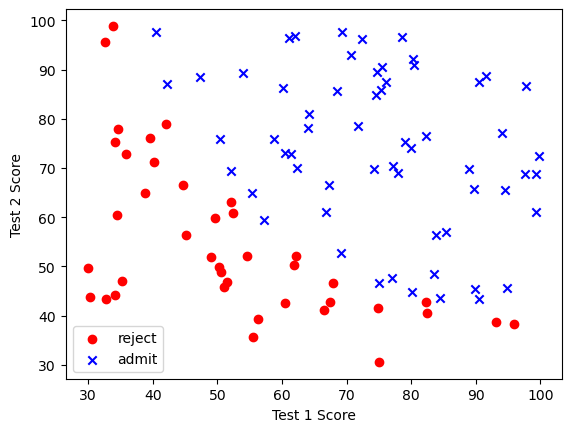

In [25]:
# plot the features against the classification
if dataset == 'admission':
    X0 = admission_data[admission_data['Admit'] == 0]
    X1 = admission_data[admission_data['Admit'] == 1]
    plt.scatter(X0['Test 1 Score'], X0['Test 2 Score'], color = 'red', marker = 'o', label = 'reject')
    plt.scatter(X1['Test 1 Score'], X1['Test 2 Score'], color = 'blue', marker = 'x', label = 'admit')
    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.legend(loc='lower left')
    plt.show()
else: 
    X0 = diabetes_data[diabetes_data['Outcome'] == 0]
    X1 = diabetes_data[diabetes_data['Outcome'] == 1]
    for col in diabetes_data.drop(columns=['Outcome']).columns: 
        plt.scatter(X0[col], X0['Outcome'], color = 'red', marker = 'o', label = 'No diabetes')
        plt.scatter(X1[col], X1['Outcome'], color = 'blue', marker = 'x', label = 'Diabetic')
        plt.xlabel(col)
        plt.ylabel('Outcome')
        plt.legend(loc='center right')
        plt.show()

In [26]:
if True & (dataset != 'admission'):
    len(diabetes_data)
    diabetes_data = diabetes_data[diabetes_data['Glucose'] > 0]
    diabetes_data = diabetes_data[diabetes_data['BloodPressure'] > 0]
    diabetes_data = diabetes_data[diabetes_data['SkinThickness'] > 0]
    diabetes_data = diabetes_data[diabetes_data['BMI'] > 0]
    len(diabetes_data)

In [27]:
if dataset == 'admission':
    admission_data.isna().sum()
else:
    diabetes_data.isna().sum()

Test 1 Score    0
Test 2 Score    0
Admit           0
dtype: int64

In [28]:
if dataset == 'admission':
    X_train, X_test, y_train, y_test = train_test_split(admission_data.drop(columns = ['Admit']), admission_data['Admit'], test_size=0.2, stratify = admission_data['Admit'], random_state=50)
else: 
    X_train, X_test, y_train, y_test = train_test_split(diabetes_data.drop(columns = ['Outcome']), diabetes_data['Outcome'], test_size=0.2, stratify = diabetes_data['Outcome'], random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train
y_test

,Test 1 Score,Test 2 Score
4,79.03,75.34
26,80.19,44.82
9,84.43,43.53
91,90.45,87.51
45,62.22,52.06
...,...,...
82,67.32,66.59
60,75.40,85.76
12,82.31,76.48
59,71.80,78.45


,Test 1 Score,Test 2 Score
70,32.72,43.31
85,68.47,85.59
93,74.49,84.85
63,30.06,49.59
14,39.54,76.04
65,66.56,41.09
67,49.07,51.88
95,83.49,48.38
18,70.66,92.93
44,51.05,45.82


4     1
26    1
9     1
91    1
45    0
     ..
82    1
60    1
12    1
59    1
20    0
Name: Admit, Length: 80, dtype: int64

70    0
85    1
93    1
63    0
14    0
65    0
67    0
95    1
18    1
44    0
83    1
58    1
27    0
94    1
10    0
90    1
56    1
3     1
19    1
6     1
Name: Admit, dtype: int64

In [29]:
if False: 
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
    X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)
    X_train
    X_test
    y_train
    y_test

In [30]:
model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'auto', penalty = 'none')
# If the lbfgs throws an error, try to increase max_iter (add max_iter = 1000), 
# also try another algorithm e.g. newton-cg, scaling is also suggested
# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

/Users/saisrivishwanath/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

0.925

array([[0.32328643, 0.2756022 ]])

array([-36.79834145])

In [31]:
if dataset == 'admission':
    test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_Admit'])
else:
    test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_Outcome'])
test_output.head()

,pred_Admit
70,0
85,1
93,1
63,0
14,0


In [32]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Percentage of correct predictions is ')
print(model.score(X_test, y_test))

,pred_Admit,Admit
70,0,0
85,1,1
93,1,1
63,0,0
14,0,0


Percentage of correct predictions is 
0.85


In [33]:
test_output = test_output.merge(X_test, left_index = True, right_index = True)
test_output.head()

,pred_Admit,Admit,Test 1 Score,Test 2 Score
70,0,0,32.72,43.31
85,1,1,68.47,85.59
93,1,1,74.49,84.85
63,0,0,30.06,49.59
14,0,0,39.54,76.04


In [34]:
if dataset == 'admission': 
    model.predict_proba(admission_data.drop(columns = ['Admit']))
else:
    model.predict_proba(diabetes_data.drop(columns = ['Outcome']))

array([[9.83716820e-01, 1.62831802e-02],
       [9.99999665e-01, 3.34877361e-07],
       [9.94043836e-01, 5.95616364e-03],
       [1.58639611e-03, 9.98413604e-01],
       [7.35887197e-05, 9.99926411e-01],
       [9.98773807e-01, 1.22619325e-03],
       [7.08145724e-05, 9.99929185e-01],
       [4.28853837e-01, 5.71146163e-01],
       [6.81304478e-06, 9.99993187e-01],
       [7.61712805e-02, 9.23828720e-01],
       [8.77209422e-03, 9.91227906e-01],
       [9.83906528e-01, 1.60934720e-02],
       [1.86618790e-05, 9.99981338e-01],
       [3.51743523e-06, 9.99996483e-01],
       [9.55221744e-01, 4.47782561e-02],
       [5.29591791e-03, 9.94704082e-01],
       [4.83384103e-01, 5.16615897e-01],
       [8.77323785e-01, 1.22676215e-01],
       [8.66258254e-06, 9.99991337e-01],
       [2.31493947e-01, 7.68506053e-01],
       [9.61265187e-01, 3.87348128e-02],
       [3.27232200e-05, 9.99967277e-01],
       [9.99085631e-01, 9.14369307e-04],
       [9.99998701e-01, 1.29914459e-06],
       [6.094197

In [35]:
data_with_prob = X_train.copy()
if dataset == 'admission':
    data_with_prob['Admit'] = y_train
else: 
    data_with_prob['Outcome'] = y_train
# Next we give the probability of predicting 1 (in multiclass, there will be probabilities by class)
if dataset == 'admission':
    data_with_prob['Probability'] = model.predict_proba(data_with_prob.drop(columns = ['Admit']))[:,1]
else: 
    data_with_prob['Probability'] = model.predict_proba(data_with_prob.drop(columns = ['Outcome']))[:,1]
data_with_prob.head()

,Test 1 Score,Test 2 Score,Admit,Probability
4,79.03,75.34,1,1.00
26,80.19,44.82,1,0.81
9,84.43,43.53,1,0.92
91,90.45,87.51,1,1.00
45,62.22,52.06,0,0.09


In [36]:
if dataset == 'admission':
    test_output['Probability'] = model.predict_proba(test_output.drop(columns = ['Admit', 'pred_Admit']))[:,1]
else:
    test_output['Probability'] = model.predict_proba(test_output.drop(columns = ['Outcome', 'pred_Outcome']))[:,1]
test_output.head()

,pred_Admit,Admit,Test 1 Score,Test 2 Score,Probability
70,0,0,32.72,43.31,0.00
85,1,1,68.47,85.59,1.00
93,1,1,74.49,84.85,1.00
63,0,0,30.06,49.59,0.00
14,0,0,39.54,76.04,0.04


#### Visualize data

Text(0.5, 0, 'Test 1 Score')

Text(0, 0.5, 'Test 2 Score')

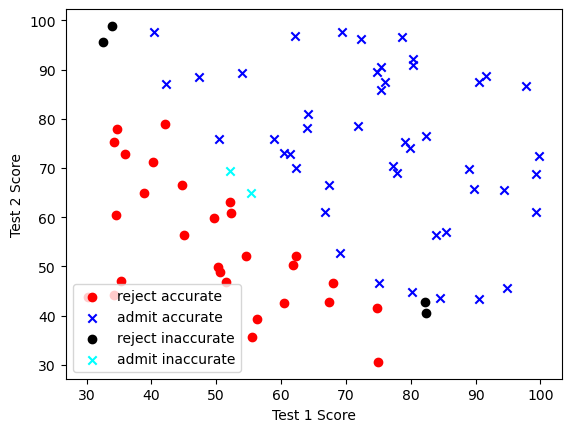

In [37]:
# plot the features against the classification [Training]
if dataset == 'admission':
    X0_right = data_with_prob[(data_with_prob['Admit'] == 0) & (data_with_prob['Probability'] < 0.5)]
    X1_right = data_with_prob[(data_with_prob['Admit'] == 1) & (data_with_prob['Probability'] >= 0.5)]
    X0_wrong = data_with_prob[(data_with_prob['Admit'] == 0) & (data_with_prob['Probability'] >= 0.5)]
    X1_wrong = data_with_prob[(data_with_prob['Admit'] == 1) & (data_with_prob['Probability'] < 0.5)]

    plt.scatter(X0_right['Test 1 Score'], X0_right['Test 2 Score'], color = 'red', marker = 'o', label = 'reject accurate')
    plt.scatter(X1_right['Test 1 Score'], X1_right['Test 2 Score'], color = 'blue', marker = 'x', label = 'admit accurate')
    plt.scatter(X0_wrong['Test 1 Score'], X0_wrong['Test 2 Score'], color = 'black', marker = 'o', label = 'reject inaccurate')
    plt.scatter(X1_wrong['Test 1 Score'], X1_wrong['Test 2 Score'], color = 'cyan', marker = 'x', label = 'admit inaccurate')
    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.legend(loc='lower left')
    plt.show()

In [38]:
if dataset != 'admission':
    for col in diabetes_data.drop(columns=['Outcome']).columns:
        X0_right = data_with_prob[(data_with_prob['Outcome'] == 0) & (data_with_prob['Probability'] < 0.5)]
        X1_right = data_with_prob[(data_with_prob['Outcome'] == 1) & (data_with_prob['Probability'] >= 0.5)]
        X0_wrong = data_with_prob[(data_with_prob['Outcome'] == 0) & (data_with_prob['Probability'] >= 0.5)]
        X1_wrong = data_with_prob[(data_with_prob['Outcome'] == 1) & (data_with_prob['Probability'] < 0.5)]
        plt.scatter(X0_right[col], X0_right['Outcome'], color = 'red', marker = 'o', label = 'not diab accurate')
        plt.scatter(X1_right[col], X1_right['Outcome'], color = 'blue', marker = 'x', label = 'diabetic accurate')
        plt.scatter(X0_wrong[col], X0_wrong['Outcome'] + 0.1, color = 'black', marker = 'o', label = 'not diab inaccurate')
        plt.scatter(X1_wrong[col], X1_wrong['Outcome'] - 0.1, color = 'cyan', marker = 'x', label = 'diabetic inaccurate')
        plt.xlabel(col)
        plt.ylabel('Outcome')
        plt.legend(loc='center right')
        plt.show()

Text(0.5, 0, 'Test 1 Score')

Text(0, 0.5, 'Test 2 Score')

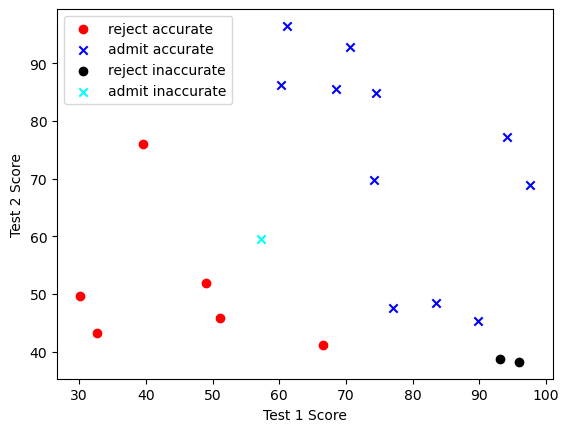

In [39]:
# plot the features against the classification [Testing]
if dataset == 'admission':
    X0_right = test_output[(test_output['Admit'] == 0) & (test_output['Probability'] < 0.5)]
    X1_right = test_output[(test_output['Admit'] == 1) & (test_output['Probability'] >= 0.5)]
    X0_wrong = test_output[(test_output['Admit'] == 0) & (test_output['Probability'] >= 0.5)]
    X1_wrong = test_output[(test_output['Admit'] == 1) & (test_output['Probability'] < 0.5)]

    plt.scatter(X0_right['Test 1 Score'], X0_right['Test 2 Score'], color = 'red', marker = 'o', label = 'reject accurate')
    plt.scatter(X1_right['Test 1 Score'], X1_right['Test 2 Score'], color = 'blue', marker = 'x', label = 'admit accurate')
    plt.scatter(X0_wrong['Test 1 Score'], X0_wrong['Test 2 Score'], color = 'black', marker = 'o', label = 'reject inaccurate')
    plt.scatter(X1_wrong['Test 1 Score'], X1_wrong['Test 2 Score'], color = 'cyan', marker = 'x', label = 'admit inaccurate')
    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.legend(loc='upper left')
    plt.show()

In [40]:
if dataset != 'admission':
    for col in diabetes_data.drop(columns=['Outcome']).columns: 
        X0_right = test_output[(test_output['Outcome'] == 0) & (test_output['Probability'] < 0.5)]
        X1_right = test_output[(test_output['Outcome'] == 1) & (test_output['Probability'] >= 0.5)]
        X0_wrong = test_output[(test_output['Outcome'] == 0) & (test_output['Probability'] >= 0.5)]
        X1_wrong = test_output[(test_output['Outcome'] == 1) & (test_output['Probability'] < 0.5)]
        plt.scatter(X0_right[col], X0_right['Outcome'], color = 'red', marker = 'o', label = 'not diab accurate')
        plt.scatter(X1_right[col], X1_right['Outcome'], color = 'blue', marker = 'x', label = 'diabetic accurate')
        plt.scatter(X0_wrong[col], X0_wrong['Outcome'] + 0.1, color = 'black', marker = 'o', label = 'not diab inaccurate')
        plt.scatter(X1_wrong[col], X1_wrong['Outcome'] - 0.1, color = 'cyan', marker = 'x', label = 'diabetic inaccurate')
        plt.xlabel(col)
        plt.ylabel('Outcome')
        plt.legend(loc='center right')
        plt.show()